# Plot the results

In [1]:
import os
import simplejson
from esd.utils import plot_log

In [2]:
results_file = "results.log"
assert os.path.exists(results_file)

In [3]:
with open(results_file, "r") as file:
    lines = file.readlines()
lines = [line for line in lines if line[0] == '{']
lines = [simplejson.loads(line) for line in lines]

In [4]:
lines

[{'esd': 100000,
  'esd_log': {'5000': 0.9986,
   '10000': 0.9995,
   '15000': 0.9842,
   '20000': 0.99925,
   '25000': 0.9996,
   '30000': 0.9813333333333333,
   '35000': 0.9836857142857143,
   '40000': 0.95935,
   '45000': 0.9699111111111111,
   '50000': 0.98964,
   '55000': 0.9803636363636363,
   '60000': 0.9735333333333334,
   '65000': 0.9177692307692308,
   '70000': 0.9762571428571428,
   '75000': 0.9841333333333333,
   '80000': 0.9854125,
   '85000': 0.9875294117647059,
   '90000': 0.9053333333333333,
   '95000': 0.9472,
   '100000': 0.98108},
  'args': {'model_name': 'resnet18',
   'data_path': '/ds/images/imagenet/',
   'synthetic_data': False,
   'num_classes': 1000,
   'batch_size': 64,
   'train_epochs': 50,
   'optimizer': 'adam',
   'lr': 0.001,
   'wd': 0.0,
   'momentum': 0.9,
   'plots_dir': 'Plots/'}},
 {'esd': 100000,
  'esd_log': {'5000': 0.998,
   '10000': 0.9977,
   '15000': 1.0,
   '20000': 0.9469,
   '25000': 0.96696,
   '30000': 0.9995333333333334,
   '35000': 0

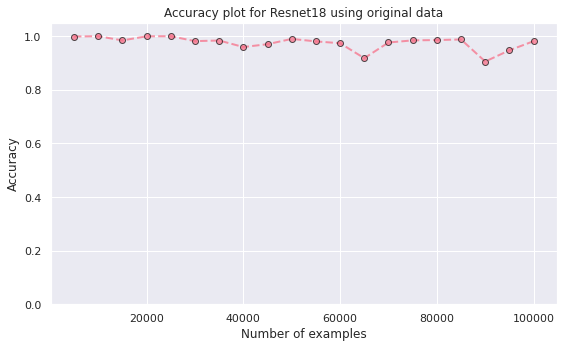

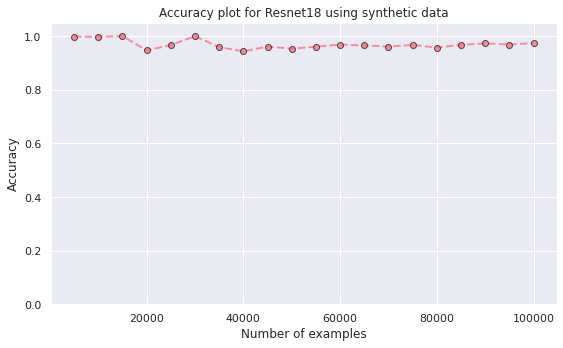

In [5]:
for log_idx, log in enumerate(lines):
    model_name = log['args']['model_name']
    synthetic_data = log['args']['synthetic_data']
    stats_dict = log['esd_log']
    converted_dict = {int(key): float(val) for key, val in stats_dict.items()}
    title = f"Accuracy plot for {model_name.title()} using {'synthetic' if synthetic_data else 'original'} data"
    output_file = f"Plots/{model_name}_{'syn' if synthetic_data else 'orig'}.png"
    plot_log(converted_dict, output_file=output_file, title=title)  # Save to file
    plot_log(converted_dict, output_file=None, title=title)  # Show the plot